# Total Factor of Productivity (TFP)

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
dt = pd.read_csv('../data/TFPData_updated.csv')

In [95]:
comp = pd.read_csv('../data/CompFunda.csv')

/Users/shinggg/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8,10,12,26,30,945,946,948,949,950,955,965,969,970,975,976) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [96]:
dt.shape

(143912, 3)

In [97]:
dt.fyear.max()

2016

In [98]:
comp.shape

(429025, 981)

In [99]:
comp.fyear.min()

1963

In [100]:
dt.head()

,gvkey,fyear,TFP
0,1000,1970,-0.103652
1,1000,1971,-0.451370
2,1000,1972,-0.279306
3,1000,1973,-0.247248
4,1000,1974,-0.298531


In [101]:
dt.TFP.describe()

count    143912.000000
mean         -0.325610
std           0.449125
min          -5.487288
25%          -0.513174
50%          -0.306304
75%          -0.109718
max           3.402086
Name: TFP, dtype: float64

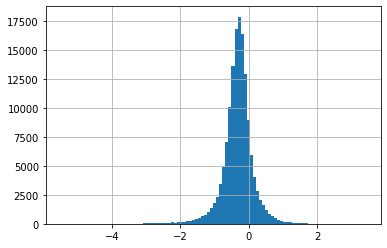

In [102]:
dt.TFP.hist(bins=100)

In [103]:
dt_TFP_frontier_yearly = dt.groupby('fyear')[['TFP']].max()
dt_TFP_mean_yearly = dt.groupby('fyear')[['TFP']].mean()
dt_TFP_median_yearly = dt.groupby('fyear')[['TFP']].median()

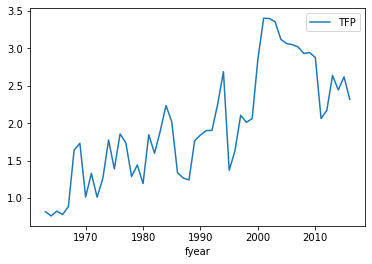

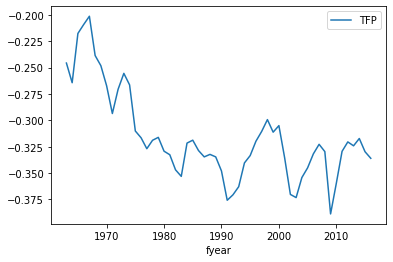

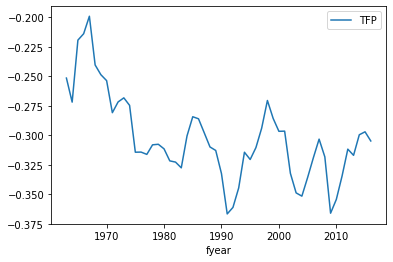

In [104]:
dt_TFP_frontier_yearly.plot()
dt_TFP_mean_yearly.plot()
dt_TFP_median_yearly.plot()

In [105]:
# create preferrerd stock
comp['ps']=np.where(comp['pstkrv'].isnull(), comp['pstkl'], comp['pstkrv'])
comp['ps']=np.where(comp['ps'].isnull(),comp['pstk'], comp['ps'])
comp['ps']=np.where(comp['ps'].isnull(),0,comp['ps'])

comp['txditc']=comp['txditc'].fillna(0)

# create book equity
comp['be']=comp['seq']+comp['txditc']-comp['ps']
comp['be']=np.where(comp['be']>0, comp['be'], np.nan)

In [106]:
# create market value
comp['me']=comp['prcc_f']*comp['csho']

In [107]:
# compare me and mkvalt
comp[comp.tic=='MMM'][['fyear','mkvalt','me','sic']]

,fyear,mkvalt,me,sic
114088,1964,NaN,2953.093375,2670
114089,1965,NaN,3631.676000,2670
114090,1966,NaN,4175.730000,2670
114091,1967,NaN,5079.847500,2670
114092,1968,NaN,5678.041260,2670
114093,1969,NaN,6145.358250,2670
114094,1970,NaN,5553.801000,2670
114095,1971,NaN,7597.935000,2670
114096,1972,NaN,9679.991875,2670
114097,1973,NaN,8821.800000,2670


In [108]:
comp['gvkey']=comp.gvkey.astype('int')

# Control
## Age
AGE is the number of years since the firm first shows up in Compustat.

In [109]:
comp['age']=comp.fyear - comp.groupby('gvkey').fyear.transform(min)

# Merge

In [110]:
df_merged=pd.merge(dt,comp, on=['gvkey','fyear'])

In [111]:
df = df_merged.copy()

In [112]:
df.shape

(143391, 986)

In [113]:
df=df[df['sic'].notna()]

In [114]:
df.shape

(143391, 986)

In [115]:
#df= df[~((df.sic >= 4900) & (df.sic < 5000))]
#df= df[~((df.sic >= 6000) & (df.sic < 7000))]

In [116]:
df.shape

(143391, 986)

In [117]:
#df=df[(df.aqc <= (0.05 * df['at']))]

In [118]:
df.shape

(143391, 986)

# Construct Frontier Productivity

In [119]:
# clip TFP
lr = df['TFP'].describe(percentiles=[0.005])['0.5%']
up = df['TFP'].describe(percentiles=[0.995])['99.5%']
df.TFP = df.TFP.clip(lr, up)

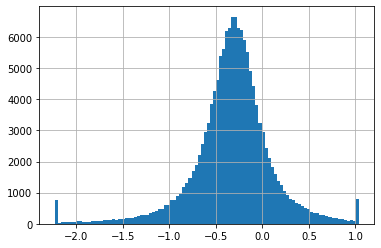

In [120]:
df.TFP.hist(bins=100)

## Construct Froniter using by Fama-French 48

In [121]:
df['sic'] = df.sic.astype('str')

In [122]:
#########################
# Assign Fama-French 48 #
#########################

# function to assign ffi48 classification
def ffi48(row):
    if (100<=row['sic'] <=299) or (700<=row['sic']<=799) or (910<=row['sic']<=919) or (row['sic']==2048):
        ffi48=1
        ffi48_desc='Agric'
    elif (2000<=row['sic']<=2046) or (2050<=row['sic']<=2063) or (2070<=row['sic']<=2079)\
    or (2090<=row['sic']<=2092) or (row['sic']==2095) or (2098<=row['sic']<=2099):
        ffi48=2
        ffi48_desc='Food'
    elif (2064<=row['sic']<=2068) or (2086<=row['sic']<=2087) or (2096<=row['sic']<=2097):
        ffi48=3
        ffi48_desc='Soda'
    elif (row['sic']==2080) or (2082<=row['sic']<=2085):
        ffi48=4
        ffi48_desc='Beer'
    elif (2100<=row['sic']<=2199):
        ffi48=5
        ffi48_desc='Smoke'
    elif (920<=row['sic']<=999) or (3650<=row['sic']<=3652) or (row['sic']==3732) or (3930<=row['sic']<=3931) or (3940<=row['sic']<=3949):
        ffi48=6
        ffi48_desc='Toys'
    elif (7800<=row['sic']<=7833) or (7840<=row['sic']<=7841) or(row['sic']==7900)or (7910<=row['sic']<=7911) or (7920<=row['sic']<=7933)\
    or (7940<=row['sic']<=7949) or (row['sic']==7980) or (7990<=row['sic']<=7999):
        ffi48=7
        ffi48_desc='Fun'
    elif (2700<=row['sic']<=2749) or (2770<=row['sic']<=2771) or (2780<=row['sic']<=2799):
        ffi48=8
        ffi48_desc='Books'
    elif (row['sic']==2047) or (2391<=row['sic']<=2392) or (2510<=row['sic']<=2519) or (2590<=row['sic']<=2599) or (2840<=row['sic']<=2844)\
    or (3160<=row['sic']<=3161) or (3170<=row['sic']<=3172) or (3190<=row['sic']<=3199) or (row['sic']==3229) or (row['sic']==3260)\
    or (3262<=row['sic']<=3263) or (row['sic']==3269) or (3230<=row['sic']<=3231) or(3630<=row['sic']<=3639) or (3750<=row['sic']<=3751)\
    or (row['sic']==3800) or (3860<=row['sic']<=3861) or (3870<=row['sic']<=3873) or (3910<=row['sic']<=3911) or (3914<=row['sic']<=3915)\
    or (3960<=row['sic']<=3962) or (row['sic']==3991) or (row['sic']==3995):
        ffi48=9
        ffi48_desc='Hshld'
    elif (2300<=row['sic']<=2390) or (3020<=row['sic']<=3021) or (3100<=row['sic']<=3111)\
    or (3130<=row['sic']<=3131) or (3140<=row['sic']<=3151) or (3963<=row['sic']<=3965):
        ffi48=10
        ffi48_desc='Clths'
    elif (8000<=row['sic']<=8099):
        ffi48=11
        ffi48_desc='Hlth'
    elif (row['sic']==3693) or (3840<=row['sic']<=3851):
        ffi48=12
        ffi48_desc='MedEq'
    elif (2830<=row['sic']<=2831) or (2833<=row['sic']<=2836):
        ffi48=13
        ffi48_desc='Drugs'
    elif (2800<=row['sic']<=2829) or (2850<=row['sic']<=2879) or (2890<=row['sic']<=2899):
        ffi48=14
        ffi48_desc='Chems'
    elif (row['sic']==3031) or (row['sic']==3041) or (3050<=row['sic']<=3053) or (3060<=row['sic']<=3069) or (3070<=row['sic']<=3099):
        ffi48=15
        ffi48_desc='Rubbr'
    elif (2200<=row['sic']<=2284) or (2290<=row['sic']<=2295) or (2297<=row['sic']<=2299) or (2393<=row['sic']<=2395) or (2397<=row['sic']<=2399):
        ffi48=16
        ffi48_desc='Txtls'
    elif (800<=row['sic']<=899) or (2400<=row['sic']<=2439) or (2450<=row['sic']<=2459) or (2490<=row['sic']<=2499) or (2660<=row['sic']<=2661)\
    or (2950<=row['sic']<=2952) or (row['sic']==3200) or (3210<=row['sic']<=3211) or (3240<=row['sic']<=3241) or (3250<=row['sic']<=3259)\
    or (row['sic']==3261) or (row['sic']==3264) or (3270<=row['sic']<=3275) or (3280<=row['sic']<=3281) or (3290<=row['sic']<=3293)\
    or (3295<=row['sic']<=3299) or (3420<=row['sic']<=3433) or (3440<=row['sic']<=3442) or (row['sic']==3446) or (3448<=row['sic']<=3452)\
    or (3490<=row['sic']<=3499) or (row['sic']==3996):
        ffi48=17
        ffi48_desc='BldMt'
    elif (1500<=row['sic']<=1511) or (1520<=row['sic']<=1549) or (1600<=row['sic']<=1799):
        ffi48=18
        ffi48_desc='Cnstr'
    elif (row['sic']==3300) or (3310<=row['sic']<=3317) or (3320<=row['sic']<=3325) or (3330<=row['sic']<=3341) or(3350<=row['sic']<=3357)\
    or (3360<=row['sic']<=3379) or (3390<=row['sic']<=3399):
        ffi48=19
        ffi48_desc='Steel'
    elif (row['sic']==3400) or (3443<=row['sic']<=3444) or (3460<=row['sic']<=3479):
        ffi48=20
        ffi48_desc='FabPr'
    elif (3510<=row['sic']<=3536) or (row['sic']==3538) or (3540<=row['sic']<=3569)\
    or (3580<=row['sic']<=3582) or (3585<=row['sic']<=3586) or (3589<=row['sic']<=3599):
        ffi48=21
        ffi48_desc='Mach'
    elif (row['sic']==3600) or (3610<=row['sic']<=3613) or (3620<=row['sic']<=3621) or (3623<=row['sic']<=3629) or (3640<=row['sic']<=3646)\
    or (3648<=row['sic']<=3649) or (row['sic']==3660) or (3690<=row['sic']<=3692) or (row['sic']==3699):
            ffi48=22
            ffi48_desc='ElcEq'
    elif (row['sic']==2296) or (row['sic']==2396) or (3010<=row['sic']<=3011) or (row['sic']==3537) or (row['sic']==3647) or (row['sic']==3694)\
    or (row['sic']==3700) or (3710<=row['sic']<=3711) or (3713<=row['sic']<=3716) or (3790<=row['sic']<=3792) or (row['sic']==3799):
        ffi48=23
        ffi48_desc='Autos'
    elif (3720<=row['sic']<=3721) or (3723<=row['sic']<=3725) or (3728<=row['sic']<=3729):
        ffi48=24
        ffi48_desc='Aero'
    elif (3730<=row['sic']<=3731) or (3740<=row['sic']<=3743):
        ffi48=25
        ffi48_desc='Ships'
    elif (3760<=row['sic']<=3769) or (row['sic']==3795) or (3480<=row['sic']<=3489):
        ffi48=26
        ffi48_desc='Guns'
    elif (1040<=row['sic']<=1049):
        ffi48=27
        ffi48_desc='Gold'
    elif (1000<=row['sic']<=1039) or (1050<=row['sic']<=1119) or (1400<=row['sic']<=1499):
        ffi48=28
        ffi48_desc='Mines'
    elif (1200<=row['sic']<=1299):
        ffi48=29
        ffi48_desc='Coal'
    elif (row['sic']==1300) or (1310<=row['sic']<=1339) or (1370<=row['sic']<=1382) or (row['sic']==1389) or (2900<=row['sic']<=2912) or (2990<=row['sic']<=2999):
        ffi48=30
        ffi48_desc='Oil'
    elif (row['sic']==4900) or (4910<=row['sic']<=4911) or (4920<=row['sic']<=4925) or (4930<=row['sic']<=4932) or (4939<=row['sic']<=4942):
        ffi48=31
        ffi48_desc='Util'
    elif (row['sic']==4800) or (4810<=row['sic']<=4813) or (4820<=row['sic']<=4822) or (4830<=row['sic']<=4841) or (4880<=row['sic']<=4892) or (row['sic']==4899):
        ffi48=32
        ffi48_desc='Telcm'
    elif (7020<=row['sic']<=7021) or (7030<=row['sic']<=7033) or (row['sic']==7200) or (7210<=row['sic']<=7212) or (7214<=row['sic']<=7217)\
    or (7219<=row['sic']<=7221) or (7230<=row['sic']<=7231) or (7240<=row['sic']<=7241) or (7250<=row['sic']<=7251) or (7260<=row['sic']<=7299)\
    or (row['sic']==7395) or (row['sic']==7500) or (7520<=row['sic']<=7549) or (row['sic']==7600) or (row['sic']==7620)\
    or (7622<=row['sic']<=7623) or (7629<=row['sic']<=7631) or (7640<=row['sic']<=7641) or (7690<=row['sic']<=7699) or (8100<=row['sic']<=8499)\
    or (8600<=row['sic']<=8699) or (8800<=row['sic']<=8899) or (7510<=row['sic']<=7515):
        ffi48=33
        ffi48_desc='PerSv'
    elif (2750<=row['sic']<=2759) or (row['sic']==3993) or (row['sic']==7218) or (row['sic']==7300) or (7310<=row['sic']<=7342)\
    or (7349<=row['sic']<=7353) or (7359<=row['sic']<=7372) or (7374<=row['sic']<=7385) or (7389<=row['sic']<=7394) or (7396<=row['sic']<=7397)\
    or (row['sic']==7399) or (row['sic']==7519) or (row['sic']==8700) or (8710<=row['sic']<=8713) or (8720<=row['sic']<=8721) \
    or (8730<=row['sic']<=8734) or (8740<=row['sic']<=8748) or (8900<=row['sic']<=8911) or (8920<=row['sic']<=8999) or (4220<=row['sic']<=4229):
        ffi48=34
        ffi48_desc='BusSv'
    elif (3570<=row['sic']<=3579) or (3680<=row['sic']<=3689) or (row['sic']==3695) or (row['sic']==7373):
        ffi48=35
        ffi48_desc='Comps'
    elif (row['sic']==3622) or (3661<=row['sic']<=3666) or (3669<=row['sic']<=3679) or (row['sic']==3810) or (row['sic']==3812):
        ffi48=36
        ffi48_desc='Chips'
    elif (row['sic']==3811) or (3820<=row['sic']<=3827) or (3829<=row['sic']<=3839):
        ffi48=37
        ffi48_desc='LabEq'
    elif (2520<=row['sic']<=2549) or (2600<=row['sic']<=2639) or (2670<=row['sic']<=2699) or (2760<=row['sic']<=2761) or (3950<=row['sic']<=3955):
        ffi48=38
        ffi48_desc='Paper'
    elif (2440<=row['sic']<=2449) or (2640<=row['sic']<=2659) or (3220<=row['sic']<=3221) or (3410<=row['sic']<=3412):
        ffi48=39
        ffi48_desc='Boxes'
    elif (4000<=row['sic']<=4013) or (4040<=row['sic']<=4049) or (row['sic']==4100)  or (4110<=row['sic']<=4121) or (4130<=row['sic']<=4131)\
    or (4140<=row['sic']<=4142) or (4150<=row['sic']<=4151) or (4170<=row['sic']<=4173) or (4190<=row['sic']<=4200)\
    or (4210<=row['sic']<=4219) or (4230<=row['sic']<=4231) or (4240<=row['sic']<=4249) or (4400<=row['sic']<=4700) or (4710<=row['sic']<=4712)\
    or (4720<=row['sic']<=4749) or (row['sic']==4780) or (4782<=row['sic']<=4785) or (row['sic']==4789):
        ffi48=40
        ffi48_desc='Trans'
    elif (row['sic']==5000) or (5010<=row['sic']<=5015) or (5020<=row['sic']<=5023) or (5030<=row['sic']<=5060) or (5063<=row['sic']<=5065)\
    or (5070<=row['sic']<=5078) or (5080<=row['sic']<=5088) or (5090<=row['sic']<=5094) or (5099<=row['sic']<=5100)\
    or (5110<=row['sic']<=5113) or (5120<=row['sic']<=5122) or (5130<=row['sic']<=5172) or (5180<=row['sic']<=5182) or (5190<=row['sic']<=5199):
        ffi48=41
        ffi48_desc='Whlsl'
    elif (row['sic']==5200) or (5210<=row['sic']<=5231) or (5250<=row['sic']<=5251) or (5260<=row['sic']<=5261) or (5270<=row['sic']<=5271)\
    or (row['sic']==5300) or (5310<=row['sic']<=5311) or (row['sic']==5320) or (5330<=row['sic']<=5331) or (row['sic']==5334)\
    or (5340<=row['sic']<=5349) or (5390<=row['sic']<=5400) or (5410<=row['sic']<=5412) or (5420<=row['sic']<=5469) or (5490<=row['sic']<=5500)\
    or (5510<=row['sic']<=5579) or (5590<=row['sic']<=5700) or (5710<=row['sic']<=5722) or (5730<=row['sic']<=5736) or (5750<=row['sic']<=5799)\
    or (row['sic']==5900) or (5910<=row['sic']<=5912) or (5920<=row['sic']<=5932) or (5940<=row['sic']<=5990) or (5992<=row['sic']<=5995) or (row['sic']==5999):
        ffi48=42
        ffi48_desc='Rtail'
    elif (5800<=row['sic']<=5829) or (5890<=row['sic']<=5899) or (row['sic']==7000) or (7010<=row['sic']<=7019) or (7040<=row['sic']<=7049) or (row['sic']==7213):
        ffi48=43
        ffi48_desc='Meals'
    elif (row['sic']==6000) or (6010<=row['sic']<=6036) or (6040<=row['sic']<=6062) or (6080<=row['sic']<=6082) or (6090<=row['sic']<=6100)\
    or (6110<=row['sic']<=6113) or (6120<=row['sic']<=6179) or (6190<=row['sic']<=6199):
        ffi48=44
        ffi48_desc='Banks'
    elif (row['sic']==6300) or (6310<=row['sic']<=6331) or (6350<=row['sic']<=6351) or (6360<=row['sic']<=6361) or (6370<=row['sic']<=6379) or (6390<=row['sic']<=6411):
        ffi48=45
        ffi48_desc='Insur'
    elif (row['sic']==6500) or (row['sic']==6510) or (6512<=row['sic']<=6515) or (6517<=row['sic']<=6532) or (6540<=row['sic']<=6541)\
    or (6550<=row['sic']<=6553) or (6590<=row['sic']<=6599) or (6610<=row['sic']<=6611):
        ffi48=46
        ffi48_desc='RlEst'
    elif (6200<=row['sic']<=6299) or (row['sic']==6700) or (6710<=row['sic']<=6726) or (6730<=row['sic']<=6733) or (6740<=row['sic']<=6779)\
    or (6790<=row['sic']<=6795) or (6798<=row['sic']<=6799):
        ffi48=47
        ffi48_desc='Fin'
    elif (4950<=row['sic']<=4961) or (4970<=row['sic']<=4971) or (4990<=row['sic']<=4991) or (row['sic']==9999):
        ffi48=48
        ffi48_desc='Other'
    else:
        ffi48=np.nan
        ffi48_desc=''
    return pd.Series({'sic': row['sic'], 'ffi48': ffi48, 'ffi48_desc': ffi48_desc})

# assign SIC code
df2 = df.copy()

# and adjust some SIC code to fit F&F 48 ind delineation
df2['sic']=np.where(df2['sic'].isin([3990,3999]), 3991, df2['sic'])
df2['sic']=df2.sic.astype(int)

# assign the ffi48 function to df
_sic = df2['sic'].unique()
_sicff = pd.DataFrame(_sic).rename(columns={0:'sic'})
_sicff = _sicff.apply(ffi48, axis=1)
df2 = pd.merge(df2, _sicff, how='left', on=['sic'])

# keep only records with non-missing bm and ffi48 classification
df2 = df2[(df2['ffi48_desc'] !='')] 
df2 = df2.sort_values(['gvkey'])

In [123]:
df = df2

In [124]:
df.loc[df.index,'TFP_frontier_fyear_ff48'] = df.groupby(['fyear', 'ffi48'])['TFP'].transform(max)
df.loc[df.index,'TFP_mean_fyear_ff48'] = df.groupby(['fyear', 'ffi48'])['TFP'].transform(np.mean)
df.loc[df.index,'TFP_median_fyear_ff48'] = df.groupby(['fyear', 'ffi48'])['TFP'].transform(np.median)

df.loc[df.index,'gap'] = df['TFP_frontier_fyear_ff48'] - df['TFP']

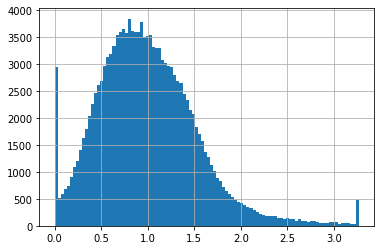

In [125]:
df.gap.hist(bins=100)

In [126]:
# remove gap == 0
#df = df[df.gap > 0]

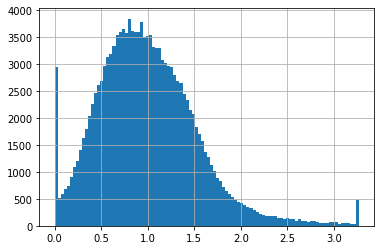

In [127]:
df.gap.hist(bins=100)

# Construct Book to Market

In [128]:
df=df[df['be'].notna()]
df=df[df['me'].notna()]

df=df[df['be']>0]
df=df[df['me']>0]

In [129]:
df.shape

(125317, 992)

In [130]:
df['beme'] = df['be']/df['me']

In [131]:
df['beme'].describe()

count    125317.000000
mean         12.006429
std        1376.646402
min           0.000052
25%           0.376906
50%           0.651460
75%           1.104969
max      308133.891213
Name: beme, dtype: float64

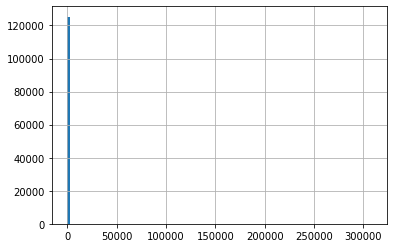

In [132]:
df['beme'].hist(bins=100)

In [133]:
df[['gap', 'beme']].corr()

,gap,beme
gap,1.000000,-0.002386
beme,-0.002386,1.000000


In [134]:
lr = df['beme'].describe(percentiles=[0.005])['0.5%']
up = df['beme'].describe(percentiles=[0.995])['99.5%']
df.beme = df.beme.clip(lr, up)

In [135]:
df.shape

(125317, 993)

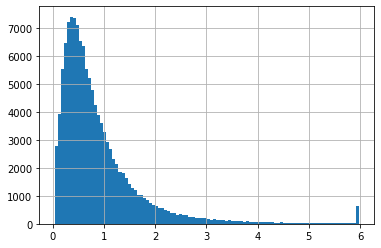

In [136]:
df.beme.hist(bins=100)

In [137]:
# clip gap
# lr = df['gap'].describe(percentiles=[0.005])['0.5%']
# up = df['gap'].describe(percentiles=[0.995])['99.5%']
# df.gap = df.gap.clip(lr, up)

In [138]:
df[['gap', 'beme']].corr()

,gap,beme
gap,1.000000,0.104423
beme,0.104423,1.000000


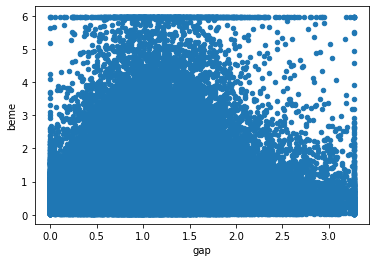

In [139]:
df.plot.scatter(x='gap', y='beme')

# Control Variables

## Size: Natural logarithm of total assets in \$ Million

In [140]:
df['size'] = np.log(df['at'])

## Leverage ratio: the ratio of total debt to the market value of equity

In [141]:
df['lev'] = (df['dltt'] + df['dlc']) / (df['prcc_f'] * df['csho'])

## R&D Intensity
research and development expenditures over sales

In [142]:
df['rdi'] = df['xrd'] / df['sale']

# Advertising Intensity
advertising expenses over sales;

In [143]:
df['adi'] = df['xad'] / df['sale']

# Employee Size

In [144]:
df['emp_size'] = np.log(df['emp'])

/Users/shinggg/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# ROA
The net income in year t divided by total assets for year t.

In [145]:
df['roa'] = df['ni']/df['at']

# ROE
The net income in year t divided by book equity for year t.

In [146]:
df['roe'] = df['ni']/df['be']

# GPR 
The gross profits in year t divided by book assets for year t.

In [147]:
df['gpr'] = df['gp']/df['at']

# Panel Regressions

In [148]:
from linearmodels import PanelOLS

In [149]:
df=df.set_index(['gvkey','fyear'])

In [150]:
mod = PanelOLS.from_formula('beme ~ 1 + gap + size + EntityEffects + TimeEffects', data=df)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res)

/Users/shinggg/anaconda3/lib/python3.6/site-packages/linearmodels/panel/data.py:98: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_categorical(s):


                          PanelOLS Estimation Summary                           
Dep. Variable:                   beme   R-squared:                        0.0428
Estimator:                   PanelOLS   R-squared (Between):             -0.1674
No. Observations:              125317   R-squared (Within):               0.0049
Date:                Wed, Dec 09 2020   R-squared (Overall):             -0.1079
Time:                        19:22:04   Log-likelihood                -9.749e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2530.5
Entities:                       12038   P-value                           0.0000
Avg Obs:                       10.410   Distribution:                F(2,113224)
Min Obs:                       1.0000                                           
Max Obs:                       54.000   F-statistic (robust):             742.39
                            

In [151]:
mod = PanelOLS.from_formula('beme ~ 1 + gap + size + EntityEffects + TimeEffects', data=df)
res = mod.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                   beme   R-squared:                        0.0428
Estimator:                   PanelOLS   R-squared (Between):             -0.1674
No. Observations:              125317   R-squared (Within):               0.0049
Date:                Wed, Dec 09 2020   R-squared (Overall):             -0.1079
Time:                        19:22:07   Log-likelihood                -9.749e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2530.5
Entities:                       12038   P-value                           0.0000
Avg Obs:                       10.410   Distribution:                F(2,113224)
Min Obs:                       1.0000                                           
Max Obs:                       54.000   F-statistic (robust):             204.76
                            

In [152]:
mod = PanelOLS.from_formula('beme ~ 1 + gap + size + emp_size + lev + rdi + adi + roa + roe + gpr + EntityEffects + TimeEffects', data=df)
res = mod.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
print(res)

/Users/shinggg/anaconda3/lib/python3.6/site-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


                          PanelOLS Estimation Summary                           
Dep. Variable:                   beme   R-squared:                        0.0697
Estimator:                   PanelOLS   R-squared (Between):             -0.0884
No. Observations:               32889   R-squared (Within):               0.0352
Date:                Wed, Dec 09 2020   R-squared (Overall):             -0.0384
Time:                        19:22:10   Log-likelihood                -2.097e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      234.56
Entities:                        4632   P-value                           0.0000
Avg Obs:                       7.1004   Distribution:                 F(9,28196)
Min Obs:                       1.0000                                           
Max Obs:                       51.000   F-statistic (robust):             20.168
                            

In [153]:
mod = PanelOLS.from_formula('beme ~ 1 + TFP + size + emp_size + lev + rdi + adi + roa + roe + gpr + EntityEffects + TimeEffects', data=df)
res = mod.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                   beme   R-squared:                        0.0748
Estimator:                   PanelOLS   R-squared (Between):             -0.0717
No. Observations:               32889   R-squared (Within):               0.0344
Date:                Wed, Dec 09 2020   R-squared (Overall):             -0.0284
Time:                        19:22:11   Log-likelihood                -2.088e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      253.12
Entities:                        4632   P-value                           0.0000
Avg Obs:                       7.1004   Distribution:                 F(9,28196)
Min Obs:                       1.0000                                           
Max Obs:                       51.000   F-statistic (robust):             24.349
                            

# Sort Portfolios

## Overall sort

In [154]:
dec_dict=df.gap.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).to_dict()
#dec_dict=df.gap.quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).to_dict()

In [155]:
dec_dict

{0.0: 0.0,
 0.1: 0.37213224000000006,
 0.2: 0.55423492,
 0.3: 0.6938805599999988,
 0.4: 0.8181438000000001,
 0.5: 0.9441631000000001,
 0.6: 1.0761085199999962,
 0.7: 1.2215794599999987,
 0.8: 1.3879006599999955,
 0.9: 1.629032419999998,
 1.0: 3.268710949999994}

In [156]:
df.loc[(df.gap >=dec_dict[0.0]) & (df.gap <= dec_dict[0.1]),['gap','TFP','beme']].mean()

gap     0.191067
TFP     0.187991
beme    0.613954
dtype: float64

In [157]:
list(dec_dict.keys())[1::]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [158]:
var_list=['gap','TFP','beme']
overall_sort_dict={}
overall_sort_gap=[]
overall_sort_TFP=[]
overall_sort_beme=[]

for i in range(0,10):
    decile = list(dec_dict.keys())[1::][i]
    if i == 0:
        print('decile = 0.1')
        overall_sort_gap.append(df.loc[(df.gap >=dec_dict[0]) & (df.gap <= dec_dict[decile]),var_list].mean()['gap'])
        overall_sort_TFP.append(df.loc[(df.gap >=dec_dict[0]) & (df.gap <= dec_dict[decile]),var_list].mean()['TFP'])
        overall_sort_beme.append(df.loc[(df.gap >=dec_dict[0]) & (df.gap <= dec_dict[decile]),var_list].mean()['beme'])
    else:
        print(decile)
        decile0 = list(dec_dict.keys())[1::][i-1]
        overall_sort_gap.append(df.loc[(df.gap >dec_dict[decile0]) & (df.gap <= dec_dict[decile]),var_list].mean()['gap'])
        overall_sort_TFP.append(df.loc[(df.gap >dec_dict[decile0]) & (df.gap <= dec_dict[decile]),var_list].mean()['TFP'])
        overall_sort_beme.append(df.loc[(df.gap >dec_dict[decile0]) & (df.gap <= dec_dict[decile]),var_list].mean()['beme'])
        
overall_sort_dict['gap']=overall_sort_gap
overall_sort_dict['TFP']=overall_sort_TFP
overall_sort_dict['beme']=overall_sort_beme

decile = 0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


In [159]:
overall_sort_dict

{'gap': [0.191067026819342,
  0.46908945161985177,
  0.6258764103742701,
  0.7568012578598768,
  0.8813961273459869,
  1.0092498750913752,
  1.1472490933929067,
  1.3021962830420541,
  1.4959747176109113,
  2.0407184042930098],
 'TFP': [0.18799060576523943,
  -0.07390185434088697,
  -0.1456036257441537,
  -0.20550261583147128,
  -0.2425805965368655,
  -0.28507034680153337,
  -0.3270691418528571,
  -0.4096317082994194,
  -0.5530721702122553,
  -1.0825396928503075],
 'beme': [0.6139536201465465,
  0.7747899634415223,
  0.8631695953380722,
  0.9105441850116606,
  0.9344377861670359,
  0.9363070668486558,
  0.9108127233816726,
  0.9334991727433851,
  0.9948074150963152,
  1.000376438228021]}

In [160]:
overall_sort_df=pd.DataFrame(overall_sort_dict)

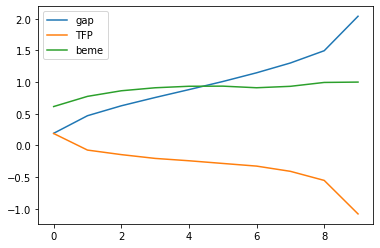

In [161]:
overall_sort_df.plot()

In [162]:
overall_sort_df.loc[9]-overall_sort_df.loc[0]

gap     1.849651
TFP    -1.270530
beme    0.386423
dtype: float64

## Sort within year then average across year

In [163]:
df.reset_index(inplace=True)

In [164]:
dec_year_dict=df[df.fyear==1987].gap.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).to_dict()

In [165]:
dec_year_dict

{0.0: 0.0,
 0.1: 0.3682740799999994,
 0.2: 0.5399441199999999,
 0.3: 0.6708237799999982,
 0.4: 0.7827724,
 0.5: 0.9072957499999972,
 0.6: 1.02376706,
 0.7: 1.1587837199999982,
 0.8: 1.3156951599999955,
 0.9: 1.5474295699999996,
 1.0: 3.268710949999994}

In [166]:
df[df.fyear==1987].loc[(df[df.fyear==1987].gap >dec_year_dict[0.1]) & (df[df.fyear==1987].gap <= dec_year_dict[0.2]), ['gap','TFP','beme']].mean()

gap     0.460534
TFP    -0.106371
beme    0.801264
dtype: float64

In [167]:
list(dec_year_dict.keys())[1::]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [168]:
len(set(df.fyear))

54

In [169]:
var_list=['gap','TFP','beme']
for year in set(df.fyear):
    overall_sort_dict={}
    overall_sort_gap=[]
    overall_sort_TFP=[]
    overall_sort_beme=[]
    dec_year_dict=df[df.fyear==year].gap.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).to_dict()
    print(year)

    for i in range(0,10):
        decile = list(dec_year_dict.keys())[1::][i]
        if i == 0:
            #print('decile = 0.1')
            overall_sort_gap.append(df[df.fyear==year].loc[(df[df.fyear==year].gap >=dec_year_dict[0]) & (df[df.fyear==year].gap <= dec_year_dict[decile]), var_list].mean()['gap'])
            overall_sort_TFP.append(df[df.fyear==year].loc[(df[df.fyear==year].gap >=dec_year_dict[0]) & (df[df.fyear==year].gap <= dec_year_dict[decile]), var_list].mean()['TFP'])
            overall_sort_beme.append(df[df.fyear==year].loc[(df[df.fyear==year].gap >=dec_year_dict[0]) & (df[df.fyear==year].gap <= dec_year_dict[decile]), var_list].mean()['beme'])
        else:
            #print(decile)
            decile0 = list(dec_year_dict.keys())[1::][i-1]
            overall_sort_gap.append(df[df.fyear==year].loc[(df[df.fyear==year].gap >dec_year_dict[decile0]) & (df[df.fyear==year].gap <= dec_year_dict[decile]), var_list].mean()['gap'])
            overall_sort_TFP.append(df[df.fyear==year].loc[(df[df.fyear==year].gap >dec_year_dict[decile0]) & (df[df.fyear==year].gap <= dec_year_dict[decile]), var_list].mean()['TFP'])
            overall_sort_beme.append(df[df.fyear==year].loc[(df[df.fyear==year].gap >dec_year_dict[decile0]) & (df[df.fyear==year].gap <= dec_year_dict[decile]), var_list].mean()['beme'])

    overall_sort_dict['gap']=overall_sort_gap
    overall_sort_dict['TFP']=overall_sort_TFP
    overall_sort_dict['beme']=overall_sort_beme

    if year==1987:
        overall_sort_df=pd.DataFrame(overall_sort_dict)
    else:
        overall_sort_df+=pd.DataFrame(overall_sort_dict)

overall_sort_df=overall_sort_df/len(set(df.fyear))

1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


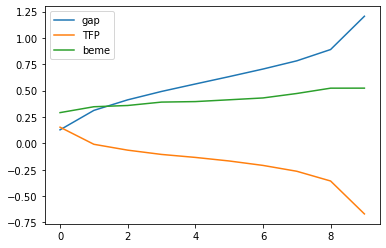

In [170]:
overall_sort_df.plot()

In [171]:
overall_sort_df

,gap,TFP,beme
0,0.128160,0.153241,0.291415
1,0.312551,-0.009000,0.347163
2,0.412622,-0.064593,0.359048
3,0.492246,-0.105188,0.391262
4,0.562995,-0.133506,0.396016
5,0.632828,-0.167218,0.413124
6,0.704758,-0.209325,0.430548
7,0.782660,-0.264815,0.472843
8,0.889876,-0.357215,0.523313
9,1.205630,-0.669463,0.523611


In [172]:
overall_sort_df.corr()

,gap,TFP,beme
gap,1.000000,-0.987269,0.965493
TFP,-0.987269,1.000000,-0.931252
beme,0.965493,-0.931252,1.000000


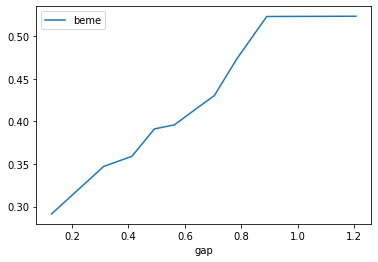

In [173]:
overall_sort_df.plot.line(y='beme',x='gap')

In [174]:
var_list_keep = ['gvkey', 'fyear', 'ffi48', 'sic', 'beme', 'TFP', 'gap', 'size', 'emp_size', 'lev', 'rdi', 'adi', 'roa', 'roe', 'gpr', 'age']

In [175]:
df2 = df[var_list_keep]

In [176]:
df2.to_csv('../data/TFP_Compustat_ff48_keep.csv', index=False)